In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 加载数据
x = torch.tensor(np.loadtxt('ex4x.dat'), dtype=torch.float32)
y = torch.tensor(np.loadtxt('ex4y.dat'), dtype=torch.float32)
y = y.reshape(-1 ,1)   # 1 接受；0 拒绝
print(x.shape)
print(y.shape)
# print(x)

torch.Size([80, 2])
torch.Size([80, 1])


In [4]:
# 添加截距项
# 为x新添加一列，放在最后
m = x.size(0)
print(m)
new_colunm = torch.ones(m).reshape(-1, 1)
x = torch.cat((x, new_colunm), dim = 1)
print(x.shape)

80
torch.Size([80, 3])


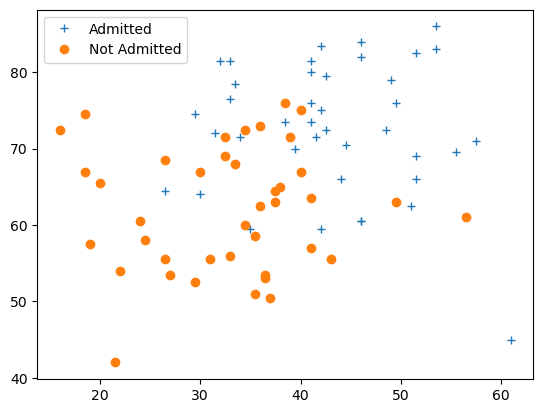

In [5]:
# plot the data

pos = torch.where(y == 1)[0]
neg = torch.where(y == 0)[0]
# print(torch.where(y == 1))

# 假设特征数据位于 x 张量的第0列和第1列
# 绘制正例（y == 1）数据点为 '+'，负例（y == 0）数据点为 'o'
plt.plot(x[pos, 0], x[pos, 1], '+', label='Admitted')
plt.plot(x[neg, 0], x[neg, 1], 'o', label='Not Admitted')

plt.legend()
# 显示图形
plt.show()

注意上面代码中torch.where(y==1)[0]中的where函数的用法：
torch.where函数会返回一个包含满足条件的元素的索引的元组。元组的第一个元素包含行索引，第二个元素包含列索引。在这里，我们只关心行索引，因为我们想获取y中值为1的元素的行索引，以找到正例样本的位置。

索引通常是一维数组（或张量），因此我们使用[0]来获取第一个元素，即行索引的数组。这个操作将我们从包含一个元素的元组中解包，得到了一个包含满足条件的元素的行索引的一维数组。

In [6]:
# 定义参数
w = torch.zeros(3, 1)
# print(w)

tensor([[0.],
        [0.],
        [0.]])


In [7]:
# 定义激活函数
def h(x, w):
    return 1 / (1 + np.exp(-torch.matmul(x,w)))

In [8]:
# 定义损失函数
def J(x, y, w):
    t1 = torch.matmul(y.T, torch.log(h(x, w)))
    t2 = torch.matmul((1 - y.T), torch.log(1-(h(x,w))))
    return (t1 - t2) / m  # 1 * 1

In [9]:
# 雅可比矩阵——损失函数的一阶导数
def J1(x, y, w):
    t1 = h(x, w)
    return torch.matmul(x.T, (t1 - y)) / m  # 1 * 1

In [16]:
# 海森矩阵，求损失函数的二阶导
def J2(x, y, w):
    t = h(x,w).view(-1)
    diag1 = torch.diag(t)
    diag2 = torch.diag(1-t)
    return torch.matmul(torch.matmul(torch.matmul(x.T,diag1),diag2),x) / m  # d * d

In [17]:
def GD(x, y, w):
    w = w - torch.matmul(torch.inverse(J2(x, y, w)), J1(x, y, w))

tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])
tensor([[0.]])


TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

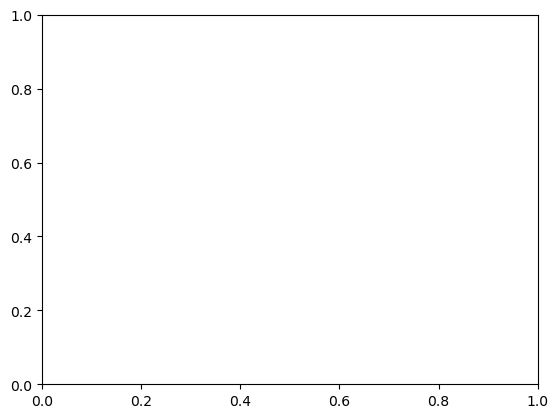

In [18]:
# 训练
epoch_num = 15

xx = [i for i in range(1, epoch_num+1)]
yy = []
ww = []
ww.append(w)

for epoch in range(epoch_num):
    loss = J(x, y, w)
    yy.append(loss.tolist)
    print(loss)
    GD(x, y, w)
    ww.append(w)

plt.plot(xx, yy)
plt.show()


In [93]:
# 定义sigmoid函数
def sigmoid(x):
    return (1. / (1. + torch.exp(-x)))

In [94]:
# 定义损失函数loss（cost）
def J(x, y, w, h=sigmoid):
    for i in range(m):
        sum = 0.
        t1 = -y[i]*torch.log(h(torch.matmul(x, w)[i]))
        t2 = (1 - y[i]) * torch.log(1 - h(torch.matmul(x, w)[i]))
        sum += (t1 - t2)
    sum = sum / m
    return sum
    # return (torch.matmul(-y.T, torch.log(z(x))) - torch.matmul((1 - y).T, torch.log(1 - z(x)))) / m

In [95]:
def J_derivative(x, y, w, z=sigmoid):
    # print(x.shape)
    # print((z(x) - y).shape)
    return torch.matmul(x.T, (z(torch.matmul(x, w)) - y))/ m

In [96]:
def J_derivative_double(x, y, w, g=sigmoid):  # 海森矩阵二阶导
    """z: 通过x计算y的函数"""
    # 计算 g(x*theta)
    gx_theta = g(torch.matmul(x, w))  # m * 1
    
    # print(gx_theta)
    diag_ = gx_theta * (-gx_theta)  # m * 1
    # print(diag_)
    diag_one = diag_.view(-1)  # m
    # print(diag_one)
    # 计算对角矩阵 diag(g(x*theta))
    R = torch.diag(diag_one)
    # print(R.shape)  # m * m
    # print(diag_gx_theta)
    # 计算对角矩阵 diag(1 - g(x*theta))
    # diag_one_minus_gx_theta = torch.diag(one_minus_gx_theta)
    # print(diag_gx_theta.shape)
    # print(diag_gx_theta)
    # print(diag_one_minus_gx_theta.shape)
    # 计算海森矩阵 H
    # H = (1/m) * torch.matmul(torch.matmul(torch.matmul(x.T, diag_gx_theta), diag_one_minus_gx_theta), x)
    # return 
    # 计算海森矩阵
    H = (1/m) * torch.matmul(torch.matmul(x.T, R), x)
    # print(H.shape)  # 3 * 3
    return H

In [97]:
def GD(x, y, w, H=J_derivative_double):
    
    return w - torch.matmul(torch.inverse(H(x, y, w)), J_derivative(x, y, w))

In [98]:
# train
num_epochs = 15



def train():
    xx = [i for i in range(1, num_epochs + 1)]
    # print(xx)
    yy = []
    w = torch.zeros(3, 1, requires_grad=True)
    for epoch in range(num_epochs):
        loss = J(x, y, w)
        # print(loss)
        loss = loss.sum().tolist()
        
        print(loss)
        # print(loss.shape)
        yy.append(loss)
        print(f"w{epoch+1}:{w}")
        w = GD(x, y, w)
    plt.plot(xx, yy)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.show()
    print(xx)
    print(yy)


0.008664339780807495
w1:tensor([[0.],
        [0.],
        [0.]], requires_grad=True)
0.010731915943324566
w2:tensor([[-0.0832],
        [-0.0880],
        [ 9.0803]], grad_fn=<SubBackward0>)
0.0025097269099205732
w3:tensor([[-0.2703],
        [-0.2896],
        [27.2437]], grad_fn=<SubBackward0>)
0.0
w4:tensor([[ -1.3170],
        [ -1.2656],
        [111.6555]], grad_fn=<SubBackward0>)
nan
w5:tensor([[ -6.5683],
        [ -4.0555],
        [392.2171]], grad_fn=<SubBackward0>)
nan
w6:tensor([[-244.7124],
        [ -36.4479],
        [7004.2275]], grad_fn=<SubBackward0>)
nan
w7:tensor([[-1022.5215],
        [ -162.7464],
        [29125.4805]], grad_fn=<SubBackward0>)
nan
w8:tensor([[-19549.6445],
        [ -3503.0574],
        [569551.7500]], grad_fn=<SubBackward0>)
nan
w9:tensor([[-8.0976e+06],
        [-1.4602e+06],
        [ 2.3543e+08]], grad_fn=<SubBackward0>)
nan
w10:tensor([[-1.6176e+07],
        [-2.9169e+06],
        [ 4.7029e+08]], grad_fn=<SubBackward0>)
nan
w11:tensor([[-2

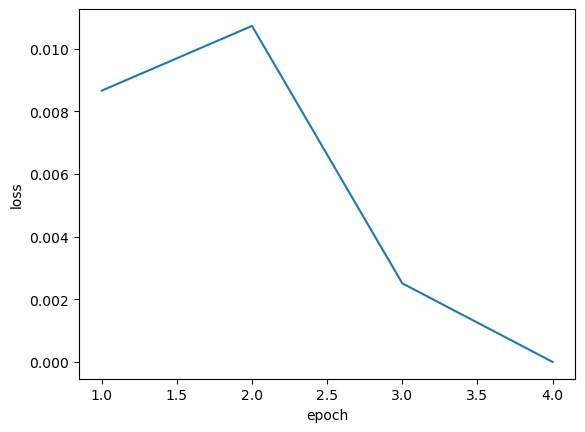

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.008664339780807495, 0.010731915943324566, 0.0025097269099205732, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [99]:
train()